In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
import subprocess
from scipy.optimize import bisect, curve_fit

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [15]:
def fitTanh(x, x0, k):
    return(0.5*(1+np.tanh(k*(x-x0))))

In [4]:
ly=100
lx=200

In [715]:
prof_destab=pd.read_csv('f_profiles.dat', sep=' ', names=np.arange(lx), index_col=False)
#mag=pd.read_csv('f_mag.dat', sep=' ', names=['t', 'M'], index_col=False)
#plt.plot(mag.t, mag.M, '-')

0.1535


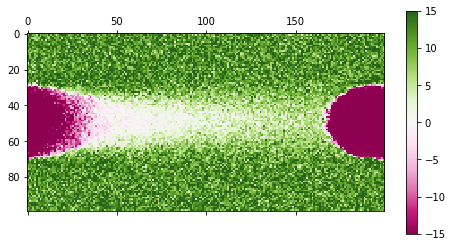

In [716]:
k=-2
v0=15

Xt=(prof_destab.values[k*ly:(k+1)*ly,:])
print(np.mean(Xt<=0))
plt.matshow(Xt, cmap='PiYG', vmin=-v0, vmax=v0)
plt.colorbar()

26.71875

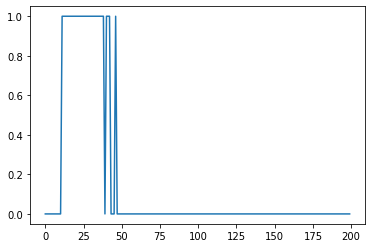

In [546]:
k=80
Xt=(prof_destab.values[k*ly:(k+1)*ly,:])
Xt_0=Xt[50,:]<-10#-np.mean(Xt[50,:])
plt.plot(Xt_0)
np.sum(np.arange(lx)*Xt_0)/np.sum(Xt_0)

## $p_{rev}(h0)$

In [4]:
import subprocess

In [5]:
def rev(h0, beta=2, v=1, D=1):
    with open('f_input.dat', 'w') as f:
        f.write('tgap = 100 tmax = 100 rho0 = 5 lx = 100 ly = 20 w0 = 1 beta = %f v = %f D = %f h0 = %f'%(beta, v, D, h0))
        
    bashCommand = "./activeIsing"
    popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE)
    popen.wait()
    output = popen.stdout.read()
    return(np.loadtxt('f_mag.dat'))


In [6]:
sample_rev={}
for h0 in np.linspace(10,150,10):
    print(h0)
    sample_rev[h0]=rev(h0, beta=2, v=1, D=1)

10.0
25.555555555555557
41.111111111111114
56.666666666666664
72.22222222222223
87.77777777777777
103.33333333333333
118.88888888888889
134.44444444444446
150.0


In [7]:
p_rev=[np.mean(np.array(sample_rev[s])>0.05) for s in sample_rev]

Text(0, 0.5, 'Probability of reversal')

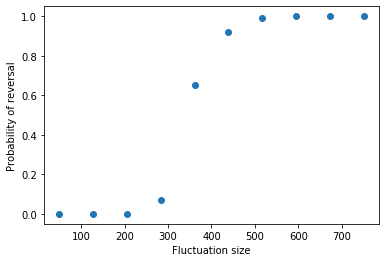

In [9]:
plt.plot(5*np.linspace(10,150,10), p_rev, 'o')
plt.xlabel('Fluctuation size')
plt.ylabel('Probability of reversal')

# $p_{rev}(\beta)$

In [130]:
def rev(h0, beta=2, v=1, D=1):
    with open('f_input.dat', 'w') as f:
        f.write('tgap = 100 tmax = 100 rho0 = 5 lx = 100 ly = 20 w0 = 1 beta = %f v = %f D = %f h0 = %f'%(beta, v, D, h0))
        
    bashCommand = "./activeIsing"
    popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE)
    popen.wait()
    output = popen.stdout.read()
    return(np.loadtxt('f_mag.dat'))


In [131]:
list_beta=np.arange(1.7, 3.7, 0.2)
list_h0=np.arange(10, 150, 10)

In [132]:
list_beta

array([1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5])

In [133]:
!export OMP_NUM_THREADS=8

In [134]:
sample_rev_beta={}

for beta in list_beta:
    sample_rev_beta[beta]={}
    for h0 in list_h0:
        try:
            sample_rev_beta[beta][h0]=np.loadtxt('data_beta_h/beta%.1f/h%d/f_mag.dat'%(beta, h0))
        except:
            print(beta,h0)

2.5 10
2.5 20
2.5 30
2.5 40
2.5 50
2.5 60
2.5 70
2.5 80
2.5 90
2.5 100
2.5 110
2.5 120
2.5 130
2.5 140


In [135]:
p_rev={beta:[np.mean(np.array(sample_rev_beta[beta][s])>0.05) for s in sample_rev_beta[beta]] for beta in list_beta}

Text(0, 0.5, 'Probability of reversal')

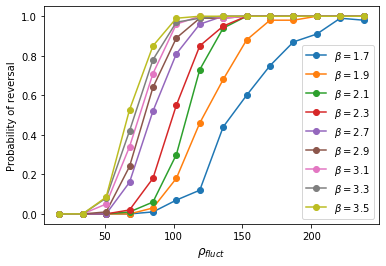

In [147]:
rho0=1.7
for beta in list_beta:
    try:
        plt.plot(rho0*list_h0, np.array(p_rev[beta]), 'o-', label=r'$\beta=%.1f$'%beta)
    except:pass
    
plt.legend()
plt.xlabel(r'$\rho_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

# Critical fluctuation size

In [6]:
from scipy.optimize import bisect

## As a function of $\beta$

In [221]:
def rev(h0, rho0=5, beta=2, v=1, D=1, r0=2):
    print(h0)
    with open('f_input.dat', 'w') as f:
        f.write('tgap = 100 tmax = 100 rho0 = %f lx = 100 ly = 40 w0 = 1 beta = %f v = %f D = %f h0 = %f r0 = %d'%(rho0, beta, v, D, h0, r0))
        
    bashCommand = "./activeIsing"
    popen = subprocess.Popen(bashCommand, stdout=subprocess.PIPE)
    popen.wait()
    output = popen.stdout.read()
    return(np.mean(np.loadtxt('f_mag.dat')>0.05)-0.5)


In [222]:
!export OMP_NUM_THREADS=8

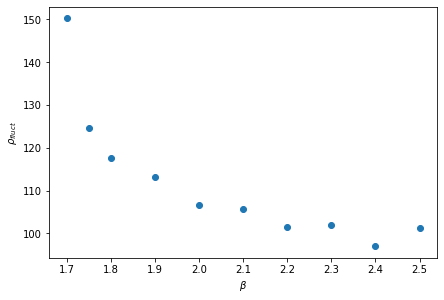

In [120]:
plt.plot(list(h0_critical_beta), [h0_critical_beta[beta] for beta in h0_critical_beta], 'o')

#plt.ylim(0., 20)


plt.xlabel(r'$\beta$')
plt.ylabel(r'$\rho_{fluct}$')
plt.tight_layout(pad=0.1)

In [126]:
h0_critical_beta

{1.7: 150.25607299804688,
 1.8: 117.6015625,
 1.9000000000000001: 113.18649291992188,
 2.0: 106.71875,
 2.1000000000000005: 105.60739135742188,
 2.2: 101.5931396484375,
 2.3000000000000007: 102.0546875,
 2.4000000000000004: 96.97158813476562,
 1.75: 124.5361328125,
 2.5: 101.15234375}

In [114]:
beta=2.5
h0_critical_beta[beta]=bisect(rev, 80, 110, args=(5, beta, 1, 1), xtol=0.1)

80.0
110.0
95.0
102.5
98.75
100.625
101.5625
101.09375
101.328125
101.2109375
101.15234375


In [90]:
list_beta=np.arange(1.7, 2.5, 0.1)
H_old=200
for beta in list_beta:
    print(beta)
    H_old=bisect(rev, 1, H_old, args=(5, beta, 1, 1), xtol=0.01)
    h0_critical_beta.append(H_old)

1.7
1.0
200.0
100.5
150.25
175.125
162.6875
156.46875
153.359375
151.8046875
151.02734375
150.638671875
150.4443359375
150.34716796875
150.298583984375
150.2742919921875
150.26214599609375
150.25607299804688
1.8
1.0
200.0
100.5
150.25
125.375
112.9375
119.15625
116.046875
117.6015625
1.9000000000000001
1.0
200.0
100.5
150.25
125.375
112.9375
119.15625
116.046875
114.4921875
113.71484375
113.326171875
113.1318359375
113.22900390625
113.180419921875
113.2047119140625
113.19256591796875
113.18649291992188
2.0
1.0
200.0
100.5
150.25
125.375
112.9375
106.71875
2.1000000000000005
1.0
200.0
100.5
150.25
125.375
112.9375
106.71875
103.609375
105.1640625
105.94140625
105.552734375
105.7470703125
105.64990234375
105.601318359375
105.6256103515625
105.61346435546875
105.60739135742188
2.2
1.0
200.0
100.5
150.25
125.375
112.9375
106.71875
103.609375
102.0546875
101.27734375
101.666015625
101.4716796875
101.56884765625
101.617431640625
101.5931396484375
2.3000000000000007
1.0
200.0
100.5
150.25
125

In [220]:
list_D=np.linspace(0.2,4,10)

In [219]:
h0_critical_D_r0={}

In [ ]:
r0=3
h0_critical_D_r0[r0]={}
for D in list_D:
    print(D)
    h0_critical_D_r0[r0][D]=bisect(rev, 1, 200, args=(5, 1.8, 1, D), xtol=0.1)

0.2
1.0
200.0
100.5
50.75
25.875
13.4375
7.21875
10.328125
8.7734375
0.6222222222222222
1.0
200.0
100.5
50.75
25.875
13.4375
19.65625
16.546875
18.1015625
17.32421875
16.935546875
17.1298828125
17.22705078125
1.0444444444444445
1.0
200.0
100.5
50.75
25.875
38.3125
32.09375
28.984375
27.4296875
26.65234375
26.263671875
26.4580078125
26.55517578125
1.4666666666666666
1.0
200.0
100.5
50.75
25.875
38.3125
44.53125
41.421875
39.8671875
40.64453125
41.033203125
40.8388671875
40.74169921875
1.8888888888888888
1.0
200.0
100.5
50.75
75.625


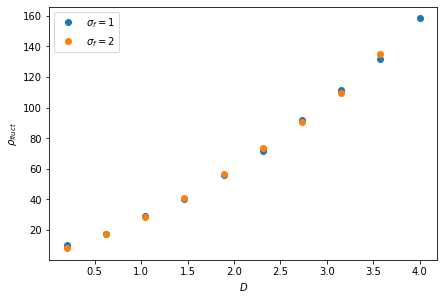

In [227]:
for r0 in list(h0_critical_D_r0):
    plt.plot(list(h0_critical_D_r0[r0]), [h0_critical_D_r0[r0][D] for D in h0_critical_D_r0[r0]], 'o', label=r'$\sigma_f=%d$'%r0)

plt.legend()
plt.xlabel(r'$D$')
plt.ylabel(r'$\rho_{fluct}$')
plt.tight_layout(pad=0.1)

# $\sigma_c$

In [150]:
list_rhof=np.round(np.arange(3,7,0.5), 1)
list_rhof2=np.round(np.arange(3.25,7,0.5), 2)

list_sigmaf=np.arange(5, 15, 1)

In [151]:
sample_rev={}

for sigmaf in list_sigmaf:
    sample_rev[sigmaf]={}
    for rhof in list_rhof:
        try:
            sample_rev[sigmaf][rhof]=np.loadtxt('data_sigmaf/sigmaf%d/rhof%.1f/f_mag.dat'%(sigmaf, rhof))
        except:
            print(sigmaf,rhof)
        
    for rhof in list_rhof2:
        try:
            sample_rev[sigmaf][rhof]=np.loadtxt('data_sigmaf/sigmaf%d/rhof%.2f/f_mag.dat'%(sigmaf, rhof))
        except:
            print(sigmaf,rhof)

14 5.5
14 6.0
14 6.5
14 5.25
14 5.75
14 6.25
14 6.75


In [152]:
p_rev={sigmaf:[np.mean(np.array(sample_rev[sigmaf][s])>0.05) for s in sample_rev[sigmaf]] for sigmaf in list_sigmaf}

Text(0, 0.5, 'Probability of reversal')

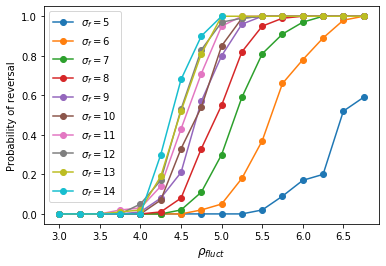

In [153]:
for sigmaf in list_sigmaf:
    abs_rhof=np.sort(list(sample_rev[sigmaf]))
    ordo_prev=np.array(p_rev[sigmaf])[np.argsort(list(sample_rev[sigmaf]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\sigma_f=%d$'%sigmaf)

    
plt.legend()
plt.xlabel(r'$\rho_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

In [146]:
s=np.argsort(list(sample_rev[sigmaf]))

In [118]:
np.array(p_rev[sigmaf])[s]

array([0.  , 0.  , 0.  , 0.  , 0.01, 0.08, 0.21, 0.57, 0.8 , 0.96, 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  ])

# $\sigma_c$ at $\rho_f = 0.1$

In [293]:
list_beta=np.round(np.arange(1.6, 2.8, 0.2), 1)

list_sigmaf=np.arange(2, 15, 1)

In [327]:
sample_rev={}

for beta in list_beta:

    sample_rev[beta]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev[beta][sigmaf]=np.loadtxt('data_beta_sigmaf/beta%.1f/sigmaf%d/f_mag.dat'%(beta, sigmaf))
        except:
            print(beta,sigmaf)


In [328]:
p_rev={beta:[np.mean(np.array(sample_rev[beta][s])>0.3) for s in sample_rev[beta]] for beta in list_beta}

Text(0, 0.5, 'Probability of reversal')

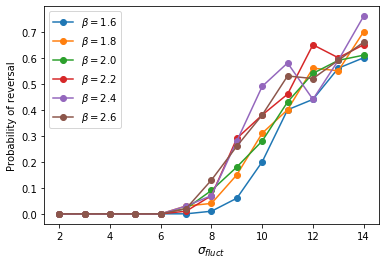

In [329]:
for beta in list_beta:
    abs_rhof=np.sort(list(sample_rev[beta]))
    ordo_prev=np.array(p_rev[beta])[np.argsort(list(sample_rev[beta]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\beta=%.1f$'%beta)

    
plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

# $\sigma_c$ at $\rho_f = 0.5$

In [356]:
list_beta=np.round(np.arange(1.6, 2.8, 0.2), 1)

list_sigmaf=np.arange(2, 16, 1)

In [364]:
sample_rev={}

for beta in list_beta:

    sample_rev[beta]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev[beta][sigmaf]=np.loadtxt('data_beta_sigmaf_rhof1/beta%.1f/sigmaf%d/f_mag.dat'%(beta, sigmaf))
        except:
            print(beta,sigmaf)


1.6 2
1.6 3
1.8 2
1.8 3
2.0 2
2.0 3
2.2 2
2.2 3
2.4 2
2.4 3
2.6 2
2.6 3


In [365]:
p_rev={beta:[np.mean(np.array(sample_rev[beta][s])>0.3) for s in sample_rev[beta]] for beta in list_beta}

Text(0, 0.5, 'Probability of reversal')

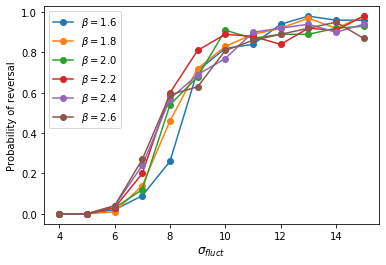

In [366]:
for beta in list_beta:
    abs_rhof=np.sort(list(sample_rev[beta]))
    ordo_prev=np.array(p_rev[beta])[np.argsort(list(sample_rev[beta]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\beta=%.1f$'%beta)

    
plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

# $\sigma_c$ at $\rho_f = 0.5$ varying $L$

In [981]:
list_L=np.array([200, 250, 300, 350, 400, 500, 600, 700, 800])

list_sigmaf=np.arange(4, 15, 1)

In [982]:
sample_rev_L={}

for L in list_L:

    sample_rev_L[L]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_L[L][sigmaf]=np.loadtxt('data_L_sigmaf/L%d/sigmaf%d/f_mag.dat'%(L, sigmaf))
        except:
            print(L,sigmaf)


In [983]:
p_rev={L:[np.mean(np.array(sample_rev_L[L][s])>0.01) for s in sample_rev_L[L]] for L in list_L}

Text(0, 0.5, 'Probability of reversal')

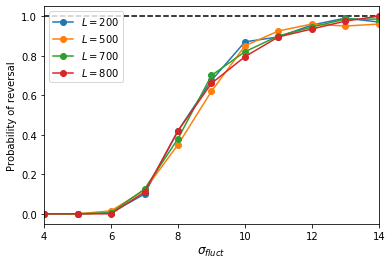

In [988]:
for L in [200, 500, 700, 800]:
    abs_rhof=np.sort(list(sample_rev_L[L]))
    ordo_prev=np.array(p_rev[L])[np.argsort(list(sample_rev_L[L]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$L=%d$'%L)

plt.ylim(-0.05,1.05)
plt.xlim(4,14)
plt.hlines(1, 4, 14, color='k', linestyles='--')

    
plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

# $\sigma_c$ at $\rho_f = 0.2\rho_0$ varying $\rho_0$

In [941]:
list_rho0=np.arange(5,36,1)

list_sigmaf=np.arange(4, 15, 1)

In [960]:
sample_rev_rho0={}

for rho0 in list_rho0:

    sample_rev_rho0[rho0]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_rho0[rho0][sigmaf]=np.loadtxt('data_rho0_sigmaf/rho0%d/sigmaf%d/f_mag.dat'%(rho0, sigmaf))
        except:
            print(rho0,sigmaf)


6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
21 4
21 5
21 6
21 7
21 8
21 9
21 10
21 11
21 12
21 13
21 14
22 4
22 5
22 6
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 14
23 4
23 5
23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 14
24 4
24 5
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 14
26 4
26 5
26 6
26 7
26 8
26 9
26 10
26 11
26 12
26 13
26 14
27 4
27 5
27 6
27 7
27 8
27 9
27 10
27 11
27 12
27 13
27 14
28 4
28 5
28 6
28 7
28 8
28 9
28 10
28 11
28 12
28 13
28 14
29 4
29 5
29 6
29 7
29 8
29 9
29 10
29 11
29 12
29 13
29 14
31 4
31 5
31 6
31 7
31 8
31 9
31 10
31 11
31 12
31 13
31 14
32

In [961]:
p_rev={rho0:[np.mean(np.array(sample_rev_rho0[rho0][s])>0.1) for s in sample_rev_rho0[rho0]] for rho0 in list_rho0}

In [962]:
list(sample_rev_rho0)[1::2]

[6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]

Text(0, 0.5, 'Probability of reversal')

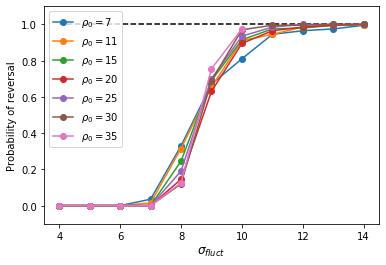

In [963]:
for rho0 in [7, 11, 15, 20, 25, 30, 35]:
    abs_rhof=np.sort(list(sample_rev_rho0[rho0]))
    ordo_prev=np.array(p_rev[rho0])[np.argsort(list(sample_rev_rho0[rho0]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\rho_0=%d$'%rho0)

plt.ylim(-0.1,1.1)

plt.hlines(1, 4, 14, color='k', linestyles='--')
plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

# $\sigma_c$ at $\rho_f = 0.2 \rho_0$ varying $\beta$

In [200]:
list_beta=np.round(np.arange(1.8, 2.8, 0.05), 2)

list_sigmaf=np.arange(4, 15, 1)

In [201]:
sample_rev_beta={}

for beta in list_beta:

    sample_rev_beta[beta]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_beta[beta][sigmaf]=np.loadtxt('data_beta_sigmaf/beta%.2f/sigmaf%d/f_mag.dat'%(beta, sigmaf))
        except:
            print(beta,sigmaf)


2.3 14
2.35 4
2.35 5
2.35 6
2.35 7
2.35 8
2.35 9
2.35 10
2.35 11
2.35 12
2.35 13
2.35 14
2.45 4
2.45 5
2.45 6
2.45 7
2.45 8
2.45 9
2.45 10
2.45 11
2.45 12
2.45 13
2.45 14
2.5 4
2.5 5
2.5 6
2.5 7
2.5 8
2.5 9
2.5 10
2.5 11
2.5 12
2.5 13
2.5 14
2.55 4
2.55 5
2.55 6
2.55 7
2.55 8
2.55 9
2.55 10
2.55 11
2.55 12
2.55 13
2.55 14
2.65 4
2.65 5
2.65 6
2.65 7
2.65 8
2.65 9
2.65 10
2.65 11
2.65 12
2.65 13
2.65 14
2.7 4
2.7 5
2.7 6
2.7 7
2.7 8
2.7 9
2.7 10
2.7 11
2.7 12
2.7 13
2.7 14
2.75 4
2.75 5
2.75 6
2.75 7
2.75 8
2.75 9
2.75 10
2.75 11
2.75 12
2.75 13
2.75 14


In [202]:
p_rev_beta={beta:[np.mean(np.array(sample_rev_beta[beta][s])>0.01) for s in sample_rev_beta[beta]] for beta in list_beta}

Text(0, 0.5, 'Probability of reversal')

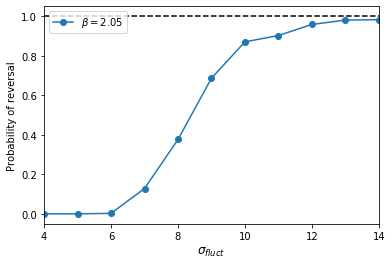

In [203]:
for beta in [2.05]:
    abs_rhof=np.sort(list(sample_rev_beta[beta]))
    ordo_prev=np.array(p_rev_beta[beta])[np.argsort(list(sample_rev_beta[beta]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\beta=%.2f$'%beta)

plt.ylim(-0.05,1.05)
plt.xlim(4,14)
plt.hlines(1, 4, 14, color='k', linestyles='--')

    
plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

In [204]:
list_x0_beta=[]
list_abs_beta=[]

for v in list(sample_rev_beta):
    try:
        abs_rhof=np.sort(list(sample_rev_beta[v]))
        ordo_prev=np.array(p_rev_beta[v])[np.argsort(list(sample_rev_beta[v]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(10, 5))

        list_x0_beta.append(popt[0])
        list_abs_beta.append(v)
    except:
        pass

[8.31604275 0.59642828]


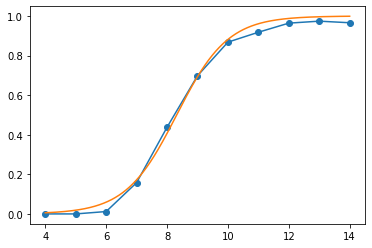

In [205]:
beta=2.2

abs_rhof=np.sort(list(sample_rev_beta[beta]))
ordo_prev=np.array(p_rev_beta[beta])[np.argsort(list(sample_rev_beta[beta]))]
plt.plot(abs_rhof, ordo_prev, '-o', label=r'$\beta=%.2f$'%beta)

popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(7, 5))
print(popt)
absx=np.linspace(4,14,1000)
plt.plot(absx, fitTanh(absx, *popt))

(0, 10)

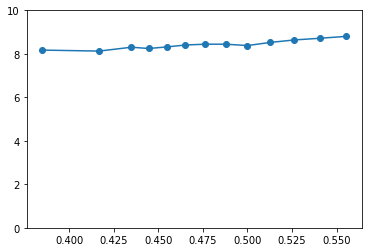

In [209]:
plt.plot(1/np.array(list_abs_beta), list_x0_beta, 'o-')
plt.ylim(0,10)

(0, 10)

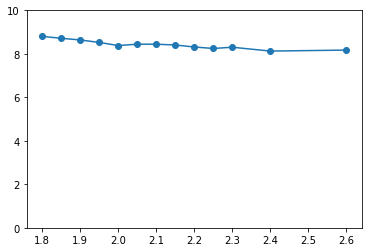

In [208]:
plt.plot(np.array(list_abs_beta), list_x0_beta, 'o-')
plt.ylim(0,10)

# $\sigma_c$ at $\rho_f = 0.2 \rho_0$ varying $D$

In [76]:
list_D=np.arange(0.4,2.2,0.2)

list_sigmaf=np.arange(4, 15, 1)

In [77]:
sample_rev_D={}

for D in list_D:

    sample_rev_D[D]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_D[D][sigmaf]=np.loadtxt('data_D_sigmaf/D%.1f/sigmaf%d/f_mag.dat'%(D, sigmaf))
        except:
            print(D,sigmaf)


1.6000000000000005 14
1.8000000000000003 12
2.0000000000000004 4
2.0000000000000004 5
2.0000000000000004 6
2.0000000000000004 7
2.0000000000000004 8
2.0000000000000004 9
2.0000000000000004 10
2.0000000000000004 11
2.0000000000000004 12
2.0000000000000004 13
2.0000000000000004 14


In [78]:
p_rev_D={D:[np.mean(np.array(sample_rev_D[D][s])>0.01) for s in sample_rev_D[D]] for D in list_D}

Text(0, 0.5, 'Probability of reversal')

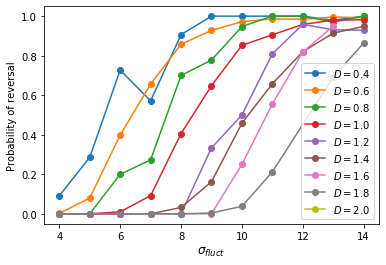

In [79]:
for D in list_D:
    abs_rhof=np.sort(list(sample_rev_D[D]))
    ordo_prev=np.array(p_rev_D[D])[np.argsort(list(sample_rev_D[D]))]
    #plt.plot(abs_rhof/(5*D+3.6), ordo_prev, '-o', label=r'$D=%.1f$'%D)
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$D=%.1f$'%D)

plt.ylim(-0.05,1.05)
#plt.xlim(4,14)
#plt.hlines(1, 4, 14, color='k', linestyles='--')

#plt.hlines([0.2, 0.5, 0.8], 4, 14, color='k', linestyles='--')

    
plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

In [80]:
list_x0_D=[]
list_abs_D=[]

for v in list(sample_rev_D):
    try:
        abs_rhof=np.sort(list(sample_rev_D[v]))
        ordo_prev=np.array(p_rev_D[v])[np.argsort(list(sample_rev_D[v]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(10, 5))

        list_x0_D.append(popt[0])
        list_abs_D.append(v)
    except:
        pass

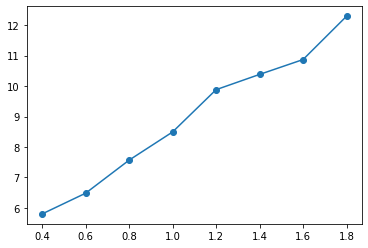

In [81]:
plt.plot(list_abs_D, list_x0_D, 'o-')

# $\sigma_c$ at $\rho_f = 0.2 \rho_0$ varying $v$

{0.5: [0.0, 0.0, 0.0, 0.0, 0.004, 0.016, 0.066, 0.202, 0.434, 0.656, 0.766],
 1.0: [0.0, 0.0, 0.01, 0.112, 0.39, 0.7, 0.834, 0.92, 0.96, 0.972, 0.982],
 1.5: [0.0, 0.0, 0.084, 0.392, 0.746, 0.888, 0.952, 0.962, 0.99, 0.998, 0.996],
 2.0: [0.0, 0.014, 0.148, 0.528, 0.786, 0.93, 0.942, 0.988, 0.994, 1.0, 0.994],
 2.5: [0.0, 0.018, 0.2, 0.578, 0.842, 0.946, 0.974, 0.996, 0.998, 0.998, 1.0],
 3.0: [0.0, 0.006, 0.196, 0.578, 0.852, 0.956, 0.986, 0.996, 1.0, 1.0, 1.0],
 3.5: [0.0, 0.012, 0.228, 0.596, 0.844, 0.968, 0.976, 0.996, 1.0, 0.998, 1.0]}

In [20]:
list_v=np.round(np.arange(0.4,4.0,0.1),1)

list_sigmaf=np.arange(4, 15, 1)

In [47]:
sample_rev_v={}

for v in list_v:

    sample_rev_v[v]={}
    for sigmaf in list_sigmaf:

        try:
            sample_rev_v[v][sigmaf]=np.loadtxt('data_v_sigmaf/v%.1f/sigmaf%d/f_mag.dat'%(v, sigmaf))
        except:
            print(v,sigmaf)


0.7 4
0.7 5
0.7 6
0.7 7
0.7 8
0.7 9
0.7 10
0.7 11
0.7 12
0.7 13
0.7 14
0.8 14
0.9 4
0.9 5
0.9 6
0.9 7
0.9 8
0.9 9
0.9 10
0.9 11
0.9 12
0.9 13
0.9 14
1.1 4
1.1 5
1.1 6
1.1 7
1.1 8
1.1 9
1.1 10
1.1 11
1.1 12
1.1 13
1.1 14
1.3 4
1.3 5
1.3 6
1.3 7
1.3 8
1.3 9
1.3 10
1.3 11
1.3 12
1.3 13
1.3 14
1.7 4
1.7 5
1.7 6
1.7 7
1.7 8
1.7 9
1.7 10
1.7 11
1.7 12
1.7 13
1.7 14
1.9 4
1.9 5
1.9 6
1.9 7
1.9 8
1.9 9
1.9 10
1.9 11
1.9 12
1.9 13
1.9 14
2.1 4
2.1 5
2.1 6
2.1 7
2.1 8
2.1 9
2.1 10
2.1 11
2.1 12
2.1 13
2.1 14
2.2 12
2.2 13
2.2 14
2.3 4
2.3 5
2.3 6
2.3 7
2.3 8
2.3 9
2.3 10
2.3 11
2.3 12
2.3 13
2.3 14
2.4 4
2.4 5
2.4 6
2.4 7
2.4 8
2.4 9
2.4 10
2.4 11
2.4 12
2.4 13
2.4 14
2.6 4
2.6 5
2.6 6
2.6 7
2.6 8
2.6 9
2.6 10
2.6 11
2.6 12
2.6 13
2.6 14
2.7 4
2.7 5
2.7 6
2.7 7
2.7 8
2.7 9
2.7 10
2.7 11
2.7 12
2.7 13
2.7 14
2.8 4
2.8 5
2.8 6
2.8 7
2.8 8
2.8 9
2.8 10
2.8 11
2.8 12
2.8 13
2.8 14
2.9 4
2.9 5
2.9 6
2.9 7
2.9 8
2.9 9
2.9 10
2.9 11
2.9 12
2.9 13
2.9 14
3.1 4
3.1 5
3.1 6
3.1 7
3.1 8
3.1 9
3.1 10
3.1 11

In [48]:
p_rev={v:[np.mean(np.array(sample_rev_v[v][s])>0.01) for s in sample_rev_v[v]] for v in list_v}

Text(0, 0.5, 'Probability of reversal')

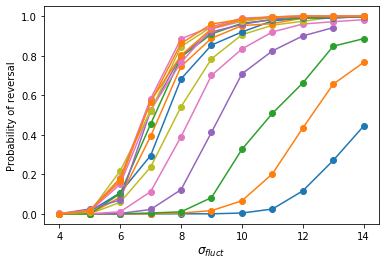

In [49]:
for v in list_v:
    abs_rhof=np.sort(list(sample_rev_v[v]))
    ordo_prev=np.array(p_rev[v])[np.argsort(list(sample_rev_v[v]))]
    plt.plot(abs_rhof, ordo_prev, '-o', label=r'$v=%.1f$'%v)

plt.ylim(-0.05,1.05)
#plt.xlim(4,14)
#plt.hlines(1, 4, 14, color='k', linestyles='--')

#plt.hlines([0.2, 0.5, 0.8], 4, 14, color='k', linestyles='--')

    
#plt.legend()
plt.xlabel(r'$\sigma_{fluct}$', fontsize=12)
plt.ylabel('Probability of reversal')

In [50]:
list_x0_v=[]
list_abs_v=[]

for v in list(sample_rev_v):
    try:
        abs_rhof=np.sort(list(sample_rev_v[v]))
        ordo_prev=np.array(p_rev[v])[np.argsort(list(sample_rev_v[v]))]

        popt, pcov = curve_fit(fitTanh, abs_rhof, ordo_prev, p0=(9, 5))

        list_x0_v.append(popt[0])
        list_abs_v.append(v)
    except:
        pass

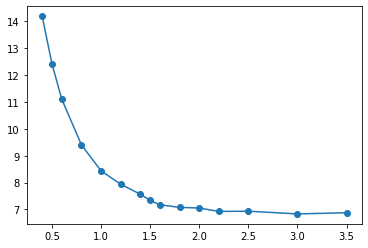

In [51]:
plt.plot(list_abs_v, list_x0_v, 'o-')